# Checking the convergence order :

In [2]:
import os
os.environ["JAX_PLATFORMS"] = "cpu"  # Ensure JAX uses CPU backend
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=100"

import matplotlib.pyplot as plt
import numpy as np
from skopt.space import Space
from skopt.sampler import Halton
import jax.numpy as jnp

import Plot_Files.Order_With_Energy_prk_method_for_plots as plots
# import Plot_Files.Without_Energy_prk_method_for_plots as plots

spacedim = [(-0.5, 0.5)] * 6
space = Space(spacedim)
halton = Halton()
n = 100

halton_sequence = halton.generate(space, n)
halton_sequence = jnp.array(halton_sequence)

"""
##########################################################################################
"""
def Convert_toOneD(A1, A2, B1, B2):
    A1D = One_Dim_Matrix(A1)
    A1D = Add_B_tomatrix_A(A1D, B1)
    A2D = One_Dim_Matrix(A2)
    A2D = Add_B_tomatrix_A(A2D, B2)
    A1D = Add_B_tomatrix_A(A1D, A2D)
    
    return A1D

def One_Dim_Matrix(A):
    """
    We use this function to convert a 2D array into a 1D array containing only the lower triangular matrix of the 2D array.
    : param A : a 2D array
    : return : a 1D array

    """
    dim_x, dim_y = A.shape
    #print(dim_x, dim_y)
    A = A.reshape(1, (dim_x * dim_y))
    return A


def Add_B_tomatrix_A(A, b):
    """
    Given 2 1D arrays this function appends the second array at the end of first array.
    : param A : 1D array
    : param b : 1D array
    : return : 1D array after appending array b to A

    """
    A = jnp.append(A,b)
    return A

##################################################

P_A1 = jnp.array([
     [0.5, 0., 0., 0.],
     [5/24, 2/3, -3/24, 0.],
     [1/6, 2/3, 1/6, 0.5],
     [0., 0., 0.5, 0.]])
P_B1 = jnp.array([2/6, 1/3, 1/6, 0.])

P_A2 = jnp.array([
     [1/6, -1/6, 0., 0.],
     [1/6, 1/3, 0, 0.],
     [1/6, 5/6, 0, 0.],
     [0., 0., 0., 0.]])
P_B2 = jnp.array([1/6, 2/3, 1/6, 0.])

################################
P_A1D_original = Convert_toOneD(P_A1, P_A2, P_B1, P_B2)  
##################################################

# Initial weights 
## Lobatto 3A and B fourth order
A1 = jnp.array([
     [0., 0., 0., 0.],
     [5/24, 1/3, -1/24, 0.],
     [1/6, 2/3, 1/6, 0.],
     [0., 0., 0., 0.]])
B1 = jnp.array([1/6, 2/3, 1/6, 0.])

A2 = jnp.array([
     [1/6, -1/6, 0., 0.],
     [1/6, 1/3, 0, 0.],
     [1/6, 5/6, 0, 0.],
     [0., 0., 0., 0.]])
B2 = jnp.array([1/6, 2/3, 1/6, 0.])

# Converting to 1D array A1D
A1D_original = Convert_toOneD(A1, A2, B1, B2)

final_A1D = np.loadtxt('With_Energy/One-batch-Lobatto-Outputs/Final_weights.txt')




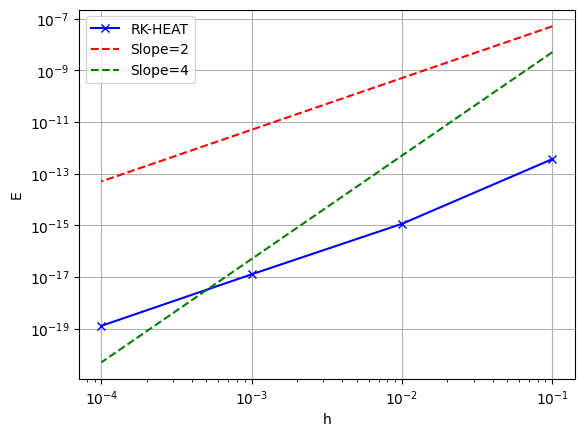

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Step size values and error list generated by your code
step_size = [0.1, 0.01, 0.001, 0.0001]
Error_list = []

# Error calculation (using your placeholder loop as an example)
for step in step_size:
    # print(step)
    Error = 0
    for i in range(0, 100, 1):
        Error_s, _, _, _, _ = plots.find_error(final_A1D, halton_sequence[i], int(1/step))
        Error += Error_s
    Error_list.append(Error / 100)

# print(Error_list)

# Plotting the actual error values
plt.plot(step_size, Error_list, marker="x", label="RK-HEAT", color = 'blue')

# Create reference lines for order 2 and order 3 convergence rates
# We will anchor these at the first error value in Error_list
ref_error = Error_list[0]

# Adjust the starting point of the reference lines using an arbitrary scaling factor
scale_factor = 0.00005  # Choose a factor to match the plot visually

# Order 2 line (h^2) with scaling factor
order_2 = [(scale_factor/10) * (h**2) for h in step_size]
plt.plot(step_size, order_2, 'r--', label="Slope=2")

# Order 3 line (h^3) with scaling factor
order_4 = [scale_factor * (h**4) for h in step_size]
plt.plot(step_size, order_4, 'g--', label="Slope=4")


# Plot formatting

plt.xlabel("h")
plt.ylabel("E")
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()  # Add a legend to identify the lines
plt.show()
